In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('confirmed.csv')
df.head()

,Unnamed: 0,Country,Population,Area,Density,GDP,handwashing_facilities,hospital_beds_per_100k,Airports,Lat,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,0,Afghanistan,38928341.0,652230.0,58.3257,74792.0,37.746,0.50,22.0,33.0000,...,8676.0,9216.0,9998.0,10582.0,11173.0,11831.0,12456.0,13036.0,13659.0,14525.0
1,1,Albania,2877800.0,28748.0,100.2128,38078.0,NaN,2.89,5.0,41.1533,...,969.0,981.0,989.0,998.0,1004.0,1029.0,1050.0,1076.0,1099.0,1122.0
2,2,Algeria,43851043.0,2381741.0,18.0763,638363.0,83.741,1.90,44.0,28.0339,...,7728.0,7918.0,8113.0,8306.0,8503.0,8697.0,8857.0,8997.0,9134.0,9267.0
3,3,Andorra,77265.0,468.0,164.8333,NaN,NaN,NaN,NaN,42.5063,...,762.0,762.0,762.0,762.0,763.0,763.0,763.0,763.0,764.0,764.0
4,4,Angola,32866268.0,1246700.0,25.5276,199329.0,26.664,NaN,25.0,-11.2027,...,58.0,60.0,61.0,69.0,70.0,70.0,71.0,74.0,81.0,84.0


In [4]:
names = df.iloc[:,11:].columns

In [5]:
new_df = pd.DataFrame()

In [6]:
for i in range(df.iloc[:, 11:].shape[1]):
    if i > 0:
        new_df[names[i]] = df[names[i]]/ df[names[i - 1]]
        new_df[names[i]] = np.array(new_df[names[i]].fillna(0) * 1000000).astype('int')

In [7]:
new_df.columns = range(len(new_df.columns))

In [8]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,0,0,0,0,0,0,0,0,0,0,...,1065193,1062240,1084852,1058411,1055849,1058891,1052827,1046563,1047790,1063401
1,0,0,0,0,0,0,0,0,0,0,...,1005186,1012383,1008154,1009100,1006012,1024900,1020408,1024761,1021375,1020928
2,0,0,0,0,0,0,0,0,0,0,...,1024661,1024585,1024627,1023788,1023717,1022815,1018397,1015806,1015227,1014560
3,0,0,0,0,0,0,0,0,0,0,...,1000000,1000000,1000000,1000000,1001312,1000000,1000000,1000000,1001310,1000000
4,0,0,0,0,0,0,0,0,0,0,...,1115384,1034482,1016666,1131147,1014492,1000000,1014285,1042253,1094594,1037037


In [9]:
import statsmodels.tsa.stattools as ts
import datetime
import time

In [10]:
def coint(country_1, country_2):
    # date_index
    date_index = []
        
    data1 = np.array(new_df.iloc[country_1, :-1]).astype('float')
    data2 = np.array(new_df.iloc[country_2, :-1]).astype('float')
    
    coint_result = ts.coint(data1, data2)
    
    return coint_result

In [11]:
data = []
buffer = []
for i in range(len(new_df)):
    data.append(buffer)
    buffer = []
    for j in range(len(new_df)):
        buffer.append([df['Country'][i], df['Country'][j], coint(i, j)[1]])

c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\loca

c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\loca

c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\loca

c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\loca

c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\loca

c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\loca

c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\loca

c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\loca

c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1398: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
c:\users\alkzir\appdata\loca

In [12]:
columns = pd.DataFrame(data[1])[1]
rows    = pd.DataFrame(data[1])[1]

In [18]:
coint_table = pd.DataFrame(data[0], columns=columns, index=rows)

In [29]:
for index in range(len(data)):
    for i in data[index]:
        coint_table[i[0]][i[1]] = i[2]

In [59]:
import seaborn as sns

In [265]:
country = np.array(coint_table['Russia'].sort_values(ascending=False)[:10].index)
coint   = np.array(coint_table['Russia'].sort_values(ascending=False)[:10].values)

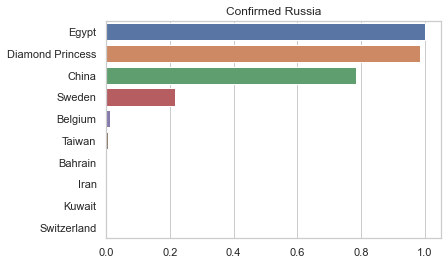

In [266]:
plt.title("Confirmed Russia")
ax = sns.barplot(x=coint, y=country)

In [260]:
country = np.array(coint_table['Germany'].sort_values(ascending=False)[:10].index)
coint   = np.array(coint_table['Germany'].sort_values(ascending=False)[:10].values)

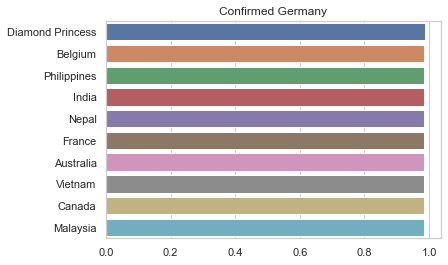

In [261]:
plt.title("Confirmed Germany")
ax = sns.barplot(x=coint, y=country)

In [263]:
country = np.array(coint_table['China'].sort_values(ascending=False)[:10].index)
coint   = np.array(coint_table['China'].sort_values(ascending=False)[:10].values)

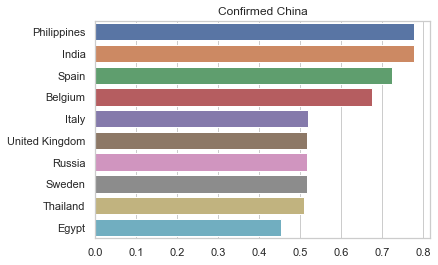

In [264]:
plt.title("Confirmed China")
ax = sns.barplot(x=coint, y=country)

#### Country with second wave

In [228]:
from collections import Counter
import scipy
from scipy.signal import find_peaks

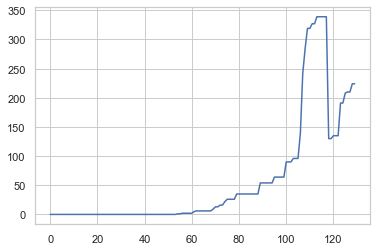

In [249]:
x = np.array(df.iloc[18, 11:])
plt.plot(x)
plt.show()

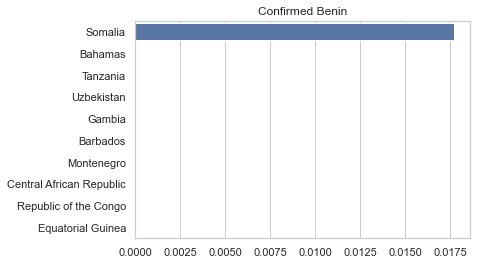

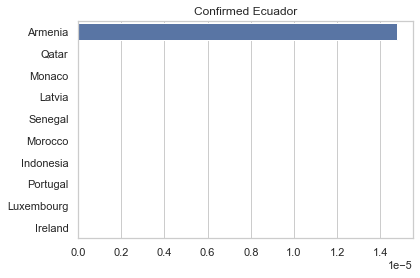

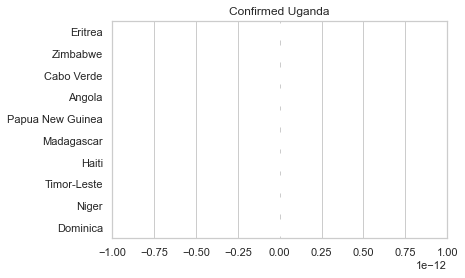

In [269]:
for i in [18, 51, 174]:
    name = df['Country'][i]
    country = np.array(coint_table[name].sort_values(ascending=False)[:10].index)
    coint   = np.array(coint_table[name].sort_values(ascending=False)[:10].values)
    plt.title("Confirmed " + name)
    ax = sns.barplot(x=coint, y=country)
    plt.show()